In [1]:
import os, shutil

In [2]:
original_dataset_dir = 'Z:\\codeplay\\Chollet-masterclass\\ch5\\cats and dogs\\PetImages'
base_dir = 'Z:\\codeplay\\Chollet-masterclass\\ch5\\cats and dogs\\cat_and_dogs_small'


In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir =os.path.join(test_dir, 'dogs')


In [13]:
from keras.preprocessing.image import ImageDataGenerator 

In [20]:
import keras

In [18]:
import matplotlib.pyplot as plt

In [14]:
#example of ImageDataGenerator

datagen = ImageDataGenerator ( rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

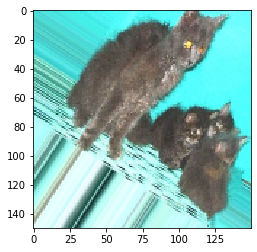

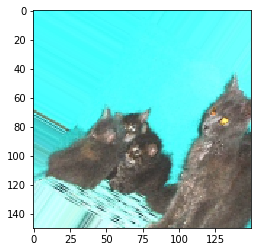

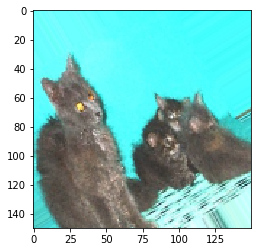

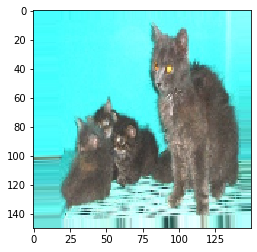

In [19]:


fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4] # wwe are just looking at onw picture

img =image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot =plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()
    

In [21]:
# we will also add dropouts

In [23]:
from keras import layers
from keras import models

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W1207 20:09:19.364801  5400 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [26]:
from keras import optimizers

In [27]:
model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr=1e-4), metrics=['acc'])

W1207 20:11:33.036999  5400 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range =40,
    width_shift_range =0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)
# we dn't augment validation data


In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [34]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)


Found 1000 images belonging to 2 classes.


In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

W1207 20:20:27.283053  5400 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/100
100/100 [==============================] - 99s 992ms/step - loss: 0.6943 - acc: 0.5152 - val_loss: 0.7334 - val_acc: 0.5133
Epoch 2/100
100/100 [==============================] - 59s 593ms/step - loss: 0.6810 - acc: 0.5594 - val_loss: 0.7683 - val_acc: 0.5773
Epoch 3/100
100/100 [==============================] - 57s 566ms/step - loss: 0.6687 - acc: 0.5808 - val_loss: 0.6489 - val_acc: 0.6256
Epoch 4/100
100/100 [==============================] - 56s 562ms/step - loss: 0.6548 - acc: 0.6092 - val_loss: 0.6073 - val_acc: 0.6005
Epoch 5/100
100/100 [==============================] - 56s 562ms/step - loss: 0.6369 - acc: 0.6263 - val_loss: 0.5857 - val_acc: 0.6599
Epoch 6/100
100/100 [==============================] - 63s 631ms/step - loss: 0.6191 - acc: 0.6493 - val_loss: 0.6143 - val_acc: 0.6237
Epoch 7/100
100/100 [==============================] - 59s 591ms/step - loss: 0.6127 - acc: 0.6624 - val_loss: 0.5590 - val_acc: 0.7024
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 16s 156ms/step - loss: 0.4066 - acc: 0.8134 - val_loss: 0.7472 - val_acc: 0.7790
Epoch 62/100
100/100 [==============================] - 17s 166ms/step - loss: 0.3883 - acc: 0.8302 - val_loss: 0.5824 - val_acc: 0.7824
Epoch 63/100
100/100 [==============================] - 16s 160ms/step - loss: 0.4033 - acc: 0.8094 - val_loss: 0.4330 - val_acc: 0.8144
Epoch 64/100
100/100 [==============================] - 15s 152ms/step - loss: 0.3889 - acc: 0.8244 - val_loss: 0.3662 - val_acc: 0.8241
Epoch 65/100
100/100 [==============================] - 16s 159ms/step - loss: 0.3996 - acc: 0.8179 - val_loss: 0.4201 - val_acc: 0.7970
Epoch 66/100
100/100 [==============================] - 15s 155ms/step - loss: 0.4028 - acc: 0.8153 - val_loss: 0.3772 - val_acc: 0.8041
Epoch 67/100
100/100 [==============================] - 15s 153ms/step - loss: 0.3926 - acc: 0.8229 - val_loss: 0.3888 - val_acc: 0.8230
Epoch 68/100
100/100 [===================

In [36]:
model.save('cats_and_dogs_augmented_dropout.h5')

<Figure size 432x288 with 0 Axes>

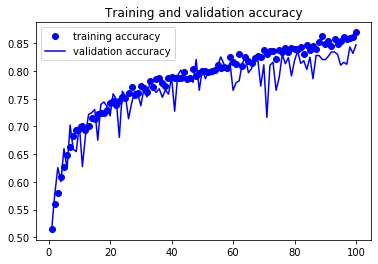

<Figure size 432x288 with 0 Axes>

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

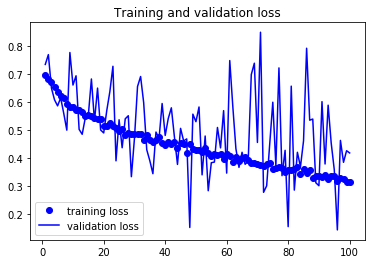

In [38]:
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()